# MANNcova: D-ONE challenge





In [ ]:
# load packages
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import folium
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

In [1]:
# optional, nice format for tables on Colab
%load_ext google.colab.data_table

In [3]:
# Set up service account for authentication.
# IMPORTANT
# Make sure you have uploaded file service-account-key.json to Colab before running this cell
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(filename="/content/service-account-key.json", scopes=["https://www.googleapis.com/auth/cloud-platform"])
# Furthermore, set up connection to BigQuery
from google.cloud import bigquery
client = bigquery.Client(project="run0002", credentials=credentials)

In [125]:
# Read "trainings" dataset (metadata, ~3MB) from BigQuery
sql_trainings = "SELECT * FROM `run0002.student_handout.trainings`"
query_job = client.query(sql_trainings)  # Make an API request.
df_trainings = query_job.result().to_dataframe() # Wait for the job to complete.

# some sanity checks
print(f"Loaded {len(df_trainings.index)} rows. Here's a preview:")
df_trainings.head()

Loaded 16352 rows. Here's a preview:


,user_id,training_id,start_date,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power,type
0,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,b402af469b4988e3032cd38bdd857223e7fe8d319d4459...,2019-12-08 08:59:54+00:00,21100,304.0,303.0,5258,6.0,<NA>,172,<NA>,RACE
1,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,76b9f9be04b79a9a3329a4c925c74eef0ccee6f492caa4...,2019-10-20 09:00:04+00:00,21000,210.0,210.0,5086,8.5,<NA>,235,<NA>,RACE
2,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,e9ac936eb22b0994df03d81b6ebc1eabae05ef0d18dc04...,2019-09-08 08:00:19+00:00,21300,180.0,180.0,5049,9.5,<NA>,175,<NA>,RACE
3,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,aec2d658c0098a559716ad49efb6e7731b6b5a7cfde3e6...,2019-10-13 08:00:04+00:00,8000,390.0,141.0,2487,15.2,<NA>,185,<NA>,RACE
4,101fe9a1cf14890d1d02bb95e725cbb64156a8d13a876f...,eb34a62d420b0a5e1e5ccc4e8dd75b3a4bdca13a07d2ea...,2019-10-06 08:31:44+00:00,42200,127.0,127.0,18303,10.5,<NA>,192,<NA>,RACE


In [26]:
# Read "run_logs" dataset (run logs, ~5GB) from BigQuery
# IMPORTANT: This is slow; try to run this cell as little as possible.
sql_logs = "SELECT * FROM `run0002.student_handout.run_logs`"
query_job = client.query(sql_logs)  # Make an API request.
df_run_logs = query_job.result().to_dataframe() # Wait for the job to complete.

# some sanity checks
print(f"Loaded {len(df_run_logs.index)} rows. Here's a preview:")
df_run_logs.head()

Loaded 30749052 rows. Here's a preview:


,user_id,training_id,time,lat,lng,hr,ele
0,595052a85685ca73707a6b42b9e9fca4b786f13bf01fa5...,12f268da7cb39fbe16839994ba1a914cf458fa76204320...,2019-05-25 05:38:18+00:00,45.799177,6.177982,91.0,1241.0
1,595052a85685ca73707a6b42b9e9fca4b786f13bf01fa5...,12f268da7cb39fbe16839994ba1a914cf458fa76204320...,2019-05-25 12:07:58+00:00,45.890856,6.189907,88.0,1210.0
2,595052a85685ca73707a6b42b9e9fca4b786f13bf01fa5...,32d84da1acf62877049ab531f552f534778ce5ea95fe51...,2019-04-22 10:30:22+00:00,46.323796,8.008786,90.0,797.0
3,35c8dd45a894f38136e83007c3a21d265c8dcd0ae453ad...,ffcc4873bb2d3fd862dad8540ca0d9adc3799918c55709...,2019-12-24 15:21:28+00:00,47.307576,7.795109,177.0,434.0
4,392982ec14f02a3bfcbbe431c5b5650e1554d6df6726a7...,2b1df4f5ab682ff9dfc47ce5e2b7bad55f8db476080493...,2019-05-18 08:16:27+00:00,46.690472,7.097967,179.0,730.0


In [27]:
# Read "exam_dataset" dataset (for you to fill in) from BigQuery
# You will have to submit this, filled with your predictions, as a .csv file for evaluation
# Consider pandas' df_exam.to_csv("teamname_submission.csv", index=False)

sql_exam = "SELECT * FROM `run0002.student_handout.exam_dataset`"
query_job = client.query(sql_exam)  # Make an API request.
df_exam = query_job.result().to_dataframe() # Wait for the job to complete.

# some sanity checks
print(f"Loaded {len(df_exam.index)} rows. Here's a preview:")
df_exam.head()

Loaded 250 rows. Here's a preview:


,training_id,user_id,type
0,00c64ed702bf204beb1208224cafd8a14fe51d1d968403...,6718565d7063a43aed889d287bbc1813afbf2119eaa4ca...,<NA>
1,02258687393f94100ef3a20c1bbbea3c30a01e79ddde6c...,eda0b1a85c94ba628c44bdefff5cf6941afac025eeee8f...,<NA>
2,0230cad3ae88a7d8ac4915366fb9e4e817e1f98bab5205...,db889e243e8ca58f3afe4066c705e2f4f67ce65becf34a...,<NA>
3,02cf5e1635db0873d51840170f469dfb2dc731806f05a2...,3f9ab926430606667ec6c7b43dc21f90286d44379bfe74...,<NA>
4,05d6ce94c401bfe4b89a2c2b13abce7817e5186cdc9525...,18988f7955b146b015d547d672a86e9223aafc657ceda0...,<NA>


In [ ]:
# By now, 
# df_trainings contains all the metadadata for training sessions
# df_run_logs contains all the logs for training sessions
# df_exam contains the 250 training_ids whose type you will have to predict
# 
# The rest is up to you. Good luck!

# EXPLORATORY ANALYSIS

In [5]:
df_trainings.head()

,user_id,training_id,start_date,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power,type
0,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,b402af469b4988e3032cd38bdd857223e7fe8d319d4459...,2019-12-08 08:59:54+00:00,21100,304.0,303.0,5258,6.0,<NA>,172,<NA>,RACE
1,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,76b9f9be04b79a9a3329a4c925c74eef0ccee6f492caa4...,2019-10-20 09:00:04+00:00,21000,210.0,210.0,5086,8.5,<NA>,235,<NA>,RACE
2,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,e9ac936eb22b0994df03d81b6ebc1eabae05ef0d18dc04...,2019-09-08 08:00:19+00:00,21300,180.0,180.0,5049,9.5,<NA>,175,<NA>,RACE
3,0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...,aec2d658c0098a559716ad49efb6e7731b6b5a7cfde3e6...,2019-10-13 08:00:04+00:00,8000,390.0,141.0,2487,15.2,<NA>,185,<NA>,RACE
4,101fe9a1cf14890d1d02bb95e725cbb64156a8d13a876f...,eb34a62d420b0a5e1e5ccc4e8dd75b3a4bdca13a07d2ea...,2019-10-06 08:31:44+00:00,42200,127.0,127.0,18303,10.5,<NA>,192,<NA>,RACE


In [21]:
df_trainings.shape

(16352, 12)

In [22]:
df_trainings.iloc[0]

user_id        0638ef6493b8192ade0e0d8429306b7685fe1191cc6e13...
training_id    b402af469b4988e3032cd38bdd857223e7fe8d319d4459...
start_date                             2019-12-08 08:59:54+00:00
distance                                                   21100
uphill                                                     304.0
downhill                                                   303.0
duration                                                    5258
temperature                                                  6.0
avg_hr                                                         0
max_hr                                                       172
power                                                          0
type                                                        RACE
Name: 0, dtype: object

In [23]:
df_trainings.describe()

,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,power
count,16352.0,16352.000000,16352.000000,16352.0,16352.000000,16352.0,16352.0,16352.0
mean,11878.686827,155.843869,150.273884,4264.455602,12.379642,142.447407,164.375856,20.493212
std,6606.848059,262.242837,237.621419,2757.473169,8.032137,16.840012,17.735869,71.533002
min,0.0,0.000000,0.000000,0.0,-16.300000,0.0,0.0,0.0
25%,7883.75,40.000000,40.000000,2790.0,6.000000,133.0,153.0,0.0
50%,10350.0,85.000000,86.000000,3630.0,12.500000,143.0,165.0,0.0
75%,14206.5,167.000000,168.000000,4850.25,18.025000,153.0,175.0,0.0
max,111000.0,7673.000000,7674.000000,103512.0,36.500000,259.0,254.0,470.0


In [50]:
df_trainings.isnull().sum()

user_id            0
training_id        0
start_date         0
distance           4
uphill             1
downhill           1
duration           4
temperature        0
avg_hr            44
max_hr             0
power          14947
type             250
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

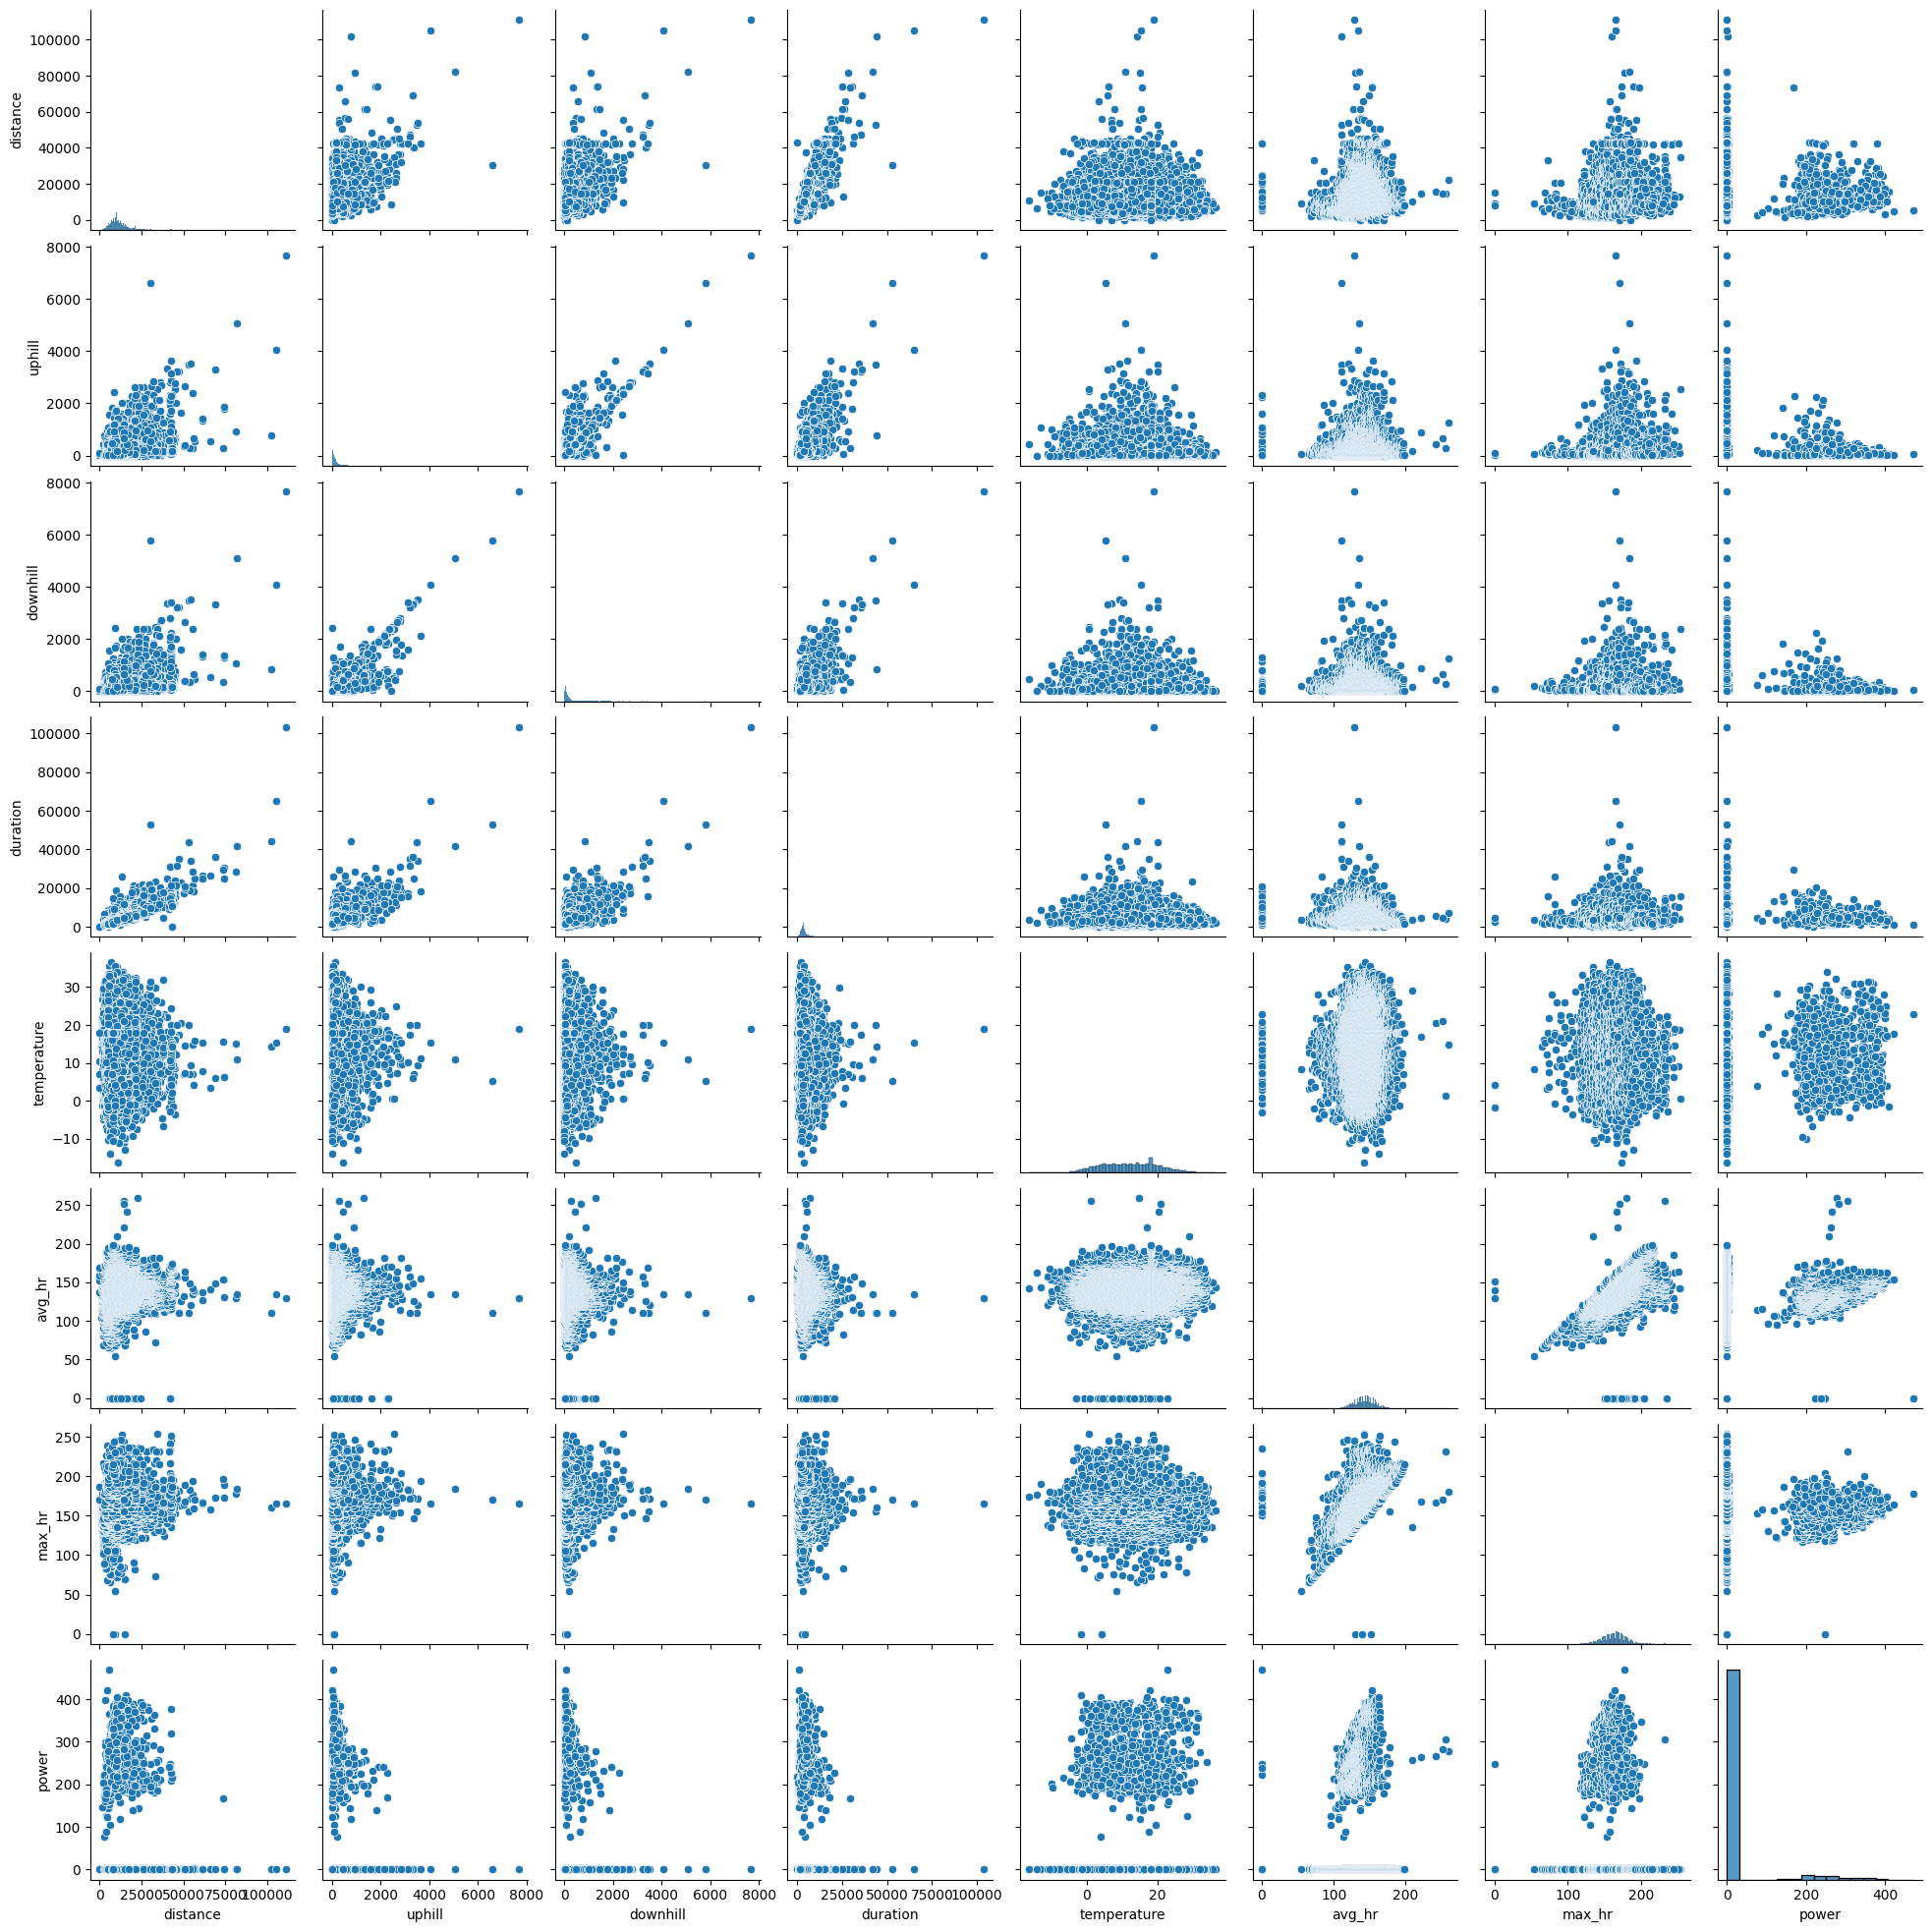

In [24]:
sns.pairplot(df_trainings)

<Axes: >

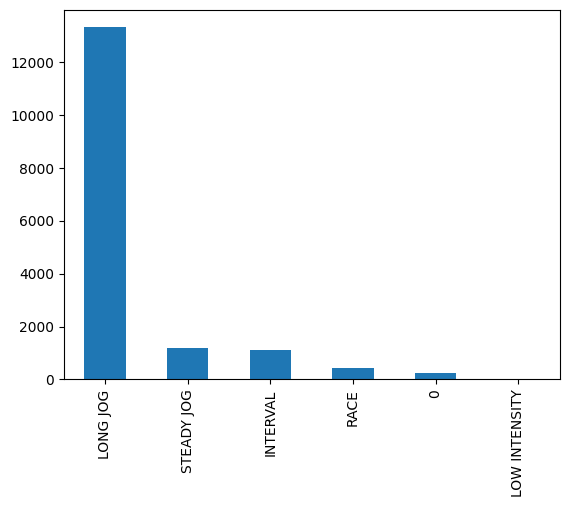

In [28]:
# distribution of response
df_trainings.loc[:,"type"].value_counts().plot(kind = "bar")

# DATA PRE-PROCESSING: Outliers and missing value imputation

In [126]:
# get indices of train & test data points
train_ids = df_trainings["type"].notnull()
test_ids = df_trainings["type"].isnull()

In [127]:
#  encode labels as dummy
df_trainings["Type_RACE"] = 1*(df_trainings["type"]=="RACE")
df_trainings["Type_INTERVAL"] = 1*(df_trainings["type"]=="INTERVAL")
df_trainings["Type_LONG_JOG"] = 1*(df_trainings["type"]=="LONG JOG")
df_trainings["Type_STEADY_JOG"] = 1*(df_trainings["type"]=="STEADY JOG")
df_trainings["Type_LOW_INTENSITY"] = 1*(df_trainings["type"]=="LOW INTENSITY")

df_trainings.drop(["type"], axis=1, inplace=True)

In [128]:
# set indicator if NA
vars_w_NAs = ["distance", "uphill", "downhill", "duration", "avg_hr", "power"]
for var in vars_w_NAs:
  df_trainings[var+"_NA"] = 1*(df_trainings[var].isnull())

In [129]:
# Duration < 10 sec
df_trainings["duration_<10"] = 1*(df_trainings["duration"] < 30)
df_trainings.loc[df_trainings["duration"] < 10, "duration"] = np.nan

# AvgHR < 30 bpm
df_trainings["avg_hr_<30"] = 1*(df_trainings["avg_hr"] < 30)
df_trainings.loc[df_trainings["avg_hr"] < 30, "avg_hr"] = np.nan

# MaxHr < 30bmp
df_trainings["max_hr_<30"] = 1*(df_trainings["max_hr"] < 30)
df_trainings.loc[df_trainings["max_hr"] < 30, "max_hr"] = np.nan

# Power < 10 W
df_trainings["power_<10"] = 1*(df_trainings["power"] < 30)
df_trainings.loc[df_trainings["power"] < 10, "power"] = np.nan

# AvgHR > MaxHR
df_trainings["avgHR>maxHR"] = 1*(df_trainings["avg_hr"] > df_trainings["max_hr"])
df_trainings.loc[df_trainings["avg_hr"] > df_trainings["max_hr"], "avg_hr"] = np.nan

In [130]:
# drop power (too many NAs)
df_trainings.drop(["power"], axis=1, inplace=True)

In [131]:
# MaxHR > 220
df_trainings["max_hr_>220"] = 1*(df_trainings["max_hr"] > 220)

# AvgHr > 220
df_trainings["avg_hr_>220"] = 1*(df_trainings["avg_hr"] > 220)

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [132]:
imputer = IterativeImputer(max_iter=10, initial_strategy="mean")
estimator = RandomForestRegressor(n_estimators=500, max_features=0.5)

cat = ["user_id", "training_id", "start_date"]
num = [var for var in df_trainings.columns if var not in cat]

df_trainings = pd.concat(
    [df_trainings[cat], pd.DataFrame(imputer.fit_transform(df_trainings.drop(cat, axis=1)), columns=num)],
                                                   axis=1)

In [61]:
df_trainings.describe()

,distance,uphill,downhill,duration,temperature,avg_hr,max_hr,Type_RACE,Type_INTERVAL,Type_LONG_JOG,...,duration_NA,avg_hr_NA,power_NA,duration_<10,avg_hr_<30,max_hr_<30,power_<10,avgHR>maxHR,max_hr_>220,avg_hr_>220
count,16352.000000,16352.000000,16352.000000,16352.000000,16352.000000,16352.000000,16352.000000,16352.000000,16352.000000,16352.000000,...,16352.000000,16352.000000,16352.000000,16352.000000,16352.0,16352.000000,16352.000000,16352.000000,16352.000000,16352.0
mean,11881.667308,155.845837,150.276297,4266.497236,12.379642,142.834642,164.405913,0.026602,0.068921,0.814029,...,0.000245,0.002691,0.914078,0.000122,0.0,0.000183,0.075819,0.000429,0.006912,0.0
std,6604.249306,262.241788,237.620093,2757.895850,8.032137,15.034159,17.595795,0.160923,0.253328,0.389095,...,0.015639,0.051805,0.280258,0.011059,0.0,0.013544,0.109752,0.020687,0.082844,0.0
min,1237.000000,0.000000,0.000000,451.000000,-16.300000,54.000000,54.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000126,0.0,0.000000,-0.987601,-0.006401,0.000000,0.0
25%,7886.000000,40.000000,40.000000,2791.750000,6.000000,133.000000,153.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.016537,0.000000,0.000000,0.0
50%,10353.000000,85.000000,86.000000,3631.500000,12.500000,143.000000,165.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.057465,0.000000,0.000000,0.0
75%,14206.500000,167.000000,168.000000,4851.500000,18.025000,153.000000,175.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.103379,0.000000,0.000000,0.0
max,111000.000000,7673.000000,7674.000000,103512.000000,36.500000,198.000000,254.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.346109,1.000000,1.000000,0.0


In [133]:
train = df_trainings.loc[train_ids,:]
test = df_trainings.loc[test_ids,:]

In [134]:
train.to_csv("trainings_train_processed.csv", index = False)
test.to_csv("trainings_test_processed.csv", index = False)

# PLOTTING RUNS

In [31]:
# def function to plot run
def plot_run(train_id):
  user1 = df_run_logs.loc[df_run_logs.training_id == train_id,:].sort_values(by="time")
  user1_gdf = gpd.GeoDataFrame(
    user1, geometry= gpd.points_from_xy(user1.lng, user1.lat, user1.ele), crs = 4326) # crs = 2056

  # Add point column in WGS84
  user1_gdf['geometry_wgs84'] = user1_gdf['geometry'].to_crs(4326)   # 4326
  map = folium.Map(location=[user1_gdf.geometry.y.mean(), user1_gdf.geometry.x.mean()], zoom_start=15)
  points = []
  for i in range(len(user1_gdf)):
    points.append( [user1_gdf.geometry.y.iloc[i], user1_gdf.geometry.x.iloc[i]])
  folium.PolyLine( points, color = "red").add_to(map)
  return map, user1_gdf

In [ ]:
training_idx = df_trainings.training_id.unique()

In [30]:
id_low_intensity = df_trainings.loc[df_trainings.loc[:,"type"] == "LOW INTENSITY", "training_id"]

In [43]:
k = id_low_intensity.iloc[2]
map, train = plot_run(k)

In [206]:
print("std dev of hr", df_trainings.loc[ df_trainings.training_id == k, "max_hr"])
print("distance", df_trainings.loc[ df_trainings.training_id == k, "distance"])
print("avg:hr", df_trainings.loc[ df_trainings.training_id == k, "avg_hr"])
map

std dev of hr 249    123.0
Name: max_hr, dtype: float64
distance 249    10330.0
Name: distance, dtype: float64
avg:hr 249    106.0
Name: avg_hr, dtype: float64


# Extract information from raw logs

# takes a very long time

import warnings
warnings.filterwarnings("ignore")

# loop over training_id, get distance in numpy and store in a list
runs_idx = sorted(df_run_logs.training_id.unique())
result = []
for j, idx in enumerate(runs_idx):
  user1 = df_run_logs.loc[df_run_logs.training_id == idx,:].sort_values(by="time")
  user1_gdf = gpd.GeoDataFrame(
    user1, geometry= gpd.points_from_xy(user1.lng, user1.lat, user1.ele), crs = 4326) # crs = 2056

  # Add point column in WGS84
  user1_gdf['geometry_wgs84'] = user1_gdf['geometry'].to_crs(4326)
  user2 = user1_gdf.shift().to_crs(4326)
  user1_gdf["cumsumm"] = user1_gdf.geometry_wgs84.to_crs("epsg:32633").distance(user2.geometry_wgs84.to_crs("epsg:32633")).cumsum() # to have them in meters
  user1_gdf["time_int"] = (user1_gdf.time - user1_gdf.shift().time).dt.total_seconds()
  user1_gdf["time_cum"] = user1_gdf.time_int.cumsum()
  user1_gdf = user1_gdf.fillna(0)
  max_km = np.ceil(user1_gdf.cumsumm.iloc[-1]/1000)
  speed_km = np.zeros(112)

  previous_dist = 0
  previous_time = 0

  for i in range(int(max_km)-1):
    time = user1_gdf.time_cum.loc[user1_gdf.cumsumm >= (i + 1) * 1000].iloc[0]
    dist = user1_gdf.cumsumm.loc[user1_gdf.cumsumm >= (i + 1) * 1000].iloc[0]
    dist_new = dist - previous_dist
    time_new = time - previous_time
    speed_km[i] = dist_new/time_new

    previous_dist = dist
    previous_time = time

  result.append(speed_km)

  if j%100 == 0:
    print(j)


# Takes a reasonable time

# get heart rate std dev and alt

import warnings
warnings.filterwarnings("ignore")

alt = []
heart_std = []
heart_90q = []
heart_10q = []


# loop over training_id, get distance in numpy and store in a list
runs_idx = sorted(df_run_logs.training_id.unique())
result = []
for j, idx in enumerate(runs_idx):
  alt.append(df_run_logs.loc[ df_run_logs.training_id == idx,"ele"].iloc[0])
  heart_std.append( df_run_logs.loc[ df_run_logs.training_id == idx,"hr"].std())
  heart_90q.append(np.quantile(df_run_logs.loc[ df_run_logs.training_id == idx,"hr"], q = 0.9))
  heart_10q.append(np.quantile(df_run_logs.loc[ df_run_logs.training_id == idx,"hr"], q = 0.1))

  # run also with quantiles
  # can get all ele if I sort for training_id and get first len(training_id.unique())

# MODEL FITTING

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train.head()

In [ ]:
train["type"] = np.nan
train.loc[train["Type_RACE"]==1, "type"] = 0
train.loc[train["Type_INTERVAL"]==1, "type"] = 1
train.loc[train["Type_LONG_JOG"]==1, "type"] = 2
train.loc[train["Type_STEADY_JOG"]==1, "type"] = 3
train.loc[train["Type_LOW_INTENSITY"]==1, "type"] = 4

train.drop(["Type_RACE", "Type_INTERVAL", "Type_LONG_JOG", "Type_STEADY_JOG", "Type_LOW_INTENSITY"], axis=1, inplace=True)

In [137]:
# design
X = train.loc[ :, ["start_date","distance", "uphill","downhill","duration","temperature", "avg_hr", "max_hr"] ]
# response
Y = pd.DataFrame(train["type"],columns = ["type"])

# test set
#X_final = 

In [138]:
X["year"] = pd.to_datetime(X.start_date).dt.year
X["month"] = pd.to_datetime(X.start_date).dt.month
X["week"] = pd.to_datetime(X.start_date).dt.week
X["day"] = pd.to_datetime(X.start_date).dt.day
X["hour"] = pd.to_datetime(X.start_date).dt.hour

X = X.drop("start_date",axis = 1)


<ipython-input-138-fb37a7c9a68d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  X["week"] = pd.to_datetime(X.start_date).dt.week


In [139]:
X["speed"] = X.distance / X.duration

In [ ]:
# can add scaling and other features here !!!




In [179]:
import warnings
warnings.filterwarnings("ignore")



# model per runner
unique_user = train.user_id.unique()
res = []
for idx, user in enumerate(unique_user):
  # get data for that runner
  dat_x = X.loc[ train.user_id == user,:]
  dat_y = Y.loc[ train.user_id == user]

  # train and test split
  X_train, X_test, Y_train, Y_test = train_test_split(dat_x,dat_y, test_size = 0.25)
  # fitting
  param_rf = {"max_depth": [5,10,20], "max_features":["sqrt","log2"]}
  rf = RandomForestClassifier(class_weight = "balanced_subsample")
  clf = GridSearchCV(rf, param_rf, cv =2)
  clf.fit(X_train, Y_train)

  y_pred = clf.predict(X_test)

  print(accuracy_score(Y_test, y_pred))
  res.append(accuracy_score(Y_test, y_pred))
  print(confusion_matrix(Y_test, y_pred))





0.7291666666666666
[[ 1  0  1  0]
 [ 0  0  4  0]
 [ 0  0 34  0]
 [ 0  0  8  0]]
0.975
[[ 1  0  0]
 [ 0 37  0]
 [ 1  0  1]]
0.9090909090909091
[[ 0  0  0  3]
 [ 0  7  0  0]
 [ 0  0 39  2]
 [ 0  0  0  4]]
0.875
[[ 0  0  1  0]
 [ 0  0  1  0]
 [ 0  0 28  0]
 [ 0  0  2  0]]
0.6451612903225806
[[ 0  0  2  0]
 [ 0  0  4  0]
 [ 0  0 20  3]
 [ 0  0  2  0]]
0.8571428571428571
[[ 0  0  2  0]
 [ 0  0  2  0]
 [ 0  0 36  1]
 [ 0  0  1  0]]
0.76
[[ 0  0  1  0]
 [ 0  0  4  0]
 [ 0  1 38  0]
 [ 0  0  6  0]]
0.9411764705882353
[[ 0  1  1]
 [ 0 32  0]
 [ 0  0  0]]
0.85
[[ 0  0  2  0]
 [ 0  0  1  0]
 [ 0  0 34  0]
 [ 0  0  3  0]]
0.7659574468085106
[[ 0  5  1]
 [ 1 35  0]
 [ 0  4  1]]
0.9285714285714286
[[ 0  0  1  0]
 [ 0  3  0  0]
 [ 0  0 34  1]
 [ 0  1  0  2]]
0.7931034482758621
[[ 0  0  1  0]
 [ 0  1  2  0]
 [ 0  0 18  1]
 [ 0  0  2  4]]
0.7027027027027027
[[ 1  1  2  0]
 [ 0  1  2  0]
 [ 2  0 24  0]
 [ 1  0  3  0]]
0.8679245283018868
[[ 0  0  0  1]
 [ 0  2  1  0]
 [ 0  0 38  0]
 [ 0  0  5  6]]
0.8181

In [180]:
# average accuracy
np.array(res).mean()

0.8525126784463268

In [ ]:
# predict for submissionf
df_exam.head()

In [ ]:
test.head()

In [162]:
X_test = test.loc[ :, ["start_date","distance", "uphill","downhill","duration","temperature", "avg_hr", "max_hr"] ]

X_test["year"] = pd.to_datetime(X_test.start_date).dt.year
X_test["month"] = pd.to_datetime(X_test.start_date).dt.month
X_test["week"] = pd.to_datetime(X_test.start_date).dt.week
X_test["day"] = pd.to_datetime(X_test.start_date).dt.day
X_test["hour"] = pd.to_datetime(X_test.start_date).dt.hour

X_test = X_test.drop("start_date",axis = 1)

X_test["speed"] = X_test.distance / X_test.duration

In [166]:
# submission
sub = pd.read_csv("exam_dataset.csv")

In [ ]:
sub.head()

In [ ]:
param_rf = {"max_depth": [5,10,20], "max_features":["sqrt","log2"]}

for j,id in enumerate(df_exam.user_id.unique()):
  print(j)
  # get training data
  dat_x = X.loc[ train.user_id == id,:]
  dat_y = Y.loc[ train.user_id == id]

  # fit forest
  rf = RandomForestClassifier()
  clf = GridSearchCV(rf, param_rf, cv = 2)
  clf.fit(dat_x, dat_y)


  # get data to predict
  data_pred = X_test.loc[test.user_id == id,:]

  mask = np.zeros(len(sub), dtype = bool)
  mask[test.user_id == id] = True
  sub.loc[mask,"type"] = clf.predict(data_pred)


  

In [169]:
# convert int to label name
sub.loc[ sub.loc[:,"type"] == 0, "type"] = "RACE"
sub.loc[ sub.loc[:,"type"] == 1, "type"] = "INTERVAL"
sub.loc[ sub.loc[:,"type"] == 2, "type"] = "LONG_JOG"
sub.loc[ sub.loc[:,"type"] == 3, "type"] = "STEADY_JOG"
sub.loc[ sub.loc[:,"type"] == 4, "type"] = "LOW_INTENSITY"


In [ ]:
# ENCODING WAS THIS
train["type"] = np.nan
train.loc[train["Type_RACE"]==1, "type"] = 0
train.loc[train["Type_INTERVAL"]==1, "type"] = 1
train.loc[train["Type_LONG_JOG"]==1, "type"] = 2
train.loc[train["Type_STEADY_JOG"]==1, "type"] = 3
train.loc[train["Type_LOW_INTENSITY"]==1, "type"] = 4

In [170]:
sub.to_csv("final_submission.csv",index=False)

<Axes: >

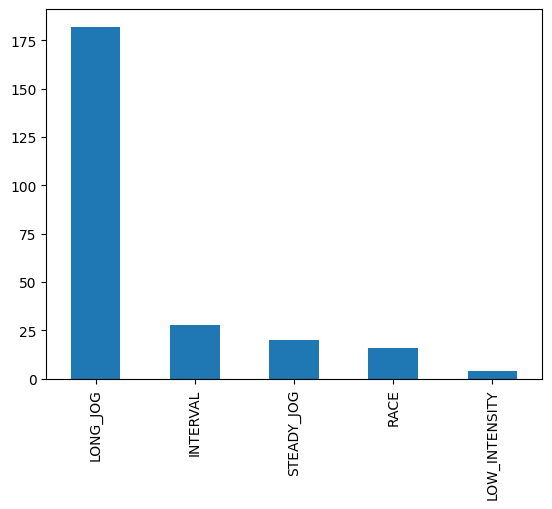

In [174]:
sub.loc[:,"type"].value_counts().plot(kind="bar")

In [178]:
sub.groupby("type").count()

,training_id,user_id
type,,
INTERVAL,28,28
LONG_JOG,182,182
LOW_INTENSITY,4,4
RACE,16,16
STEADY_JOG,20,20


In [183]:
 # check if predicted race is actually a race
 to_check = df_exam.loc[sub.loc[:,"type"] == "RACE", "training_id"]

In [201]:
df_trainings.loc[ df_trainings.training_id == to_check.iloc[12],"distance"]

14776    21030.0
Name: distance, dtype: float64

In [ ]:
# 12,13 actually seem a race

# MODEL ON FULL DATA

In [141]:
# train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

In [ ]:
for i in range(X_train.shape[1]):
  print(X_train.iloc[:,i].dtype)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# fitting
param_rf = {"max_depth": [5,10,20,50], "max_features":["sqrt","log2"]}
rf = RandomForestClassifier(class_weight = "balanced_subsample")
clf = GridSearchCV(rf, param_rf, cv =2)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(Y_test, y_pred))

In [149]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[  35,    0,   88,    0,    0],
       [   0,   11,  292,    1,    0],
       [  10,    2, 3281,    3,    0],
       [   0,    3,  294,    1,    0],
       [   0,    0,    5,    0,    0]])

In [ ]:
# predict for submission
param_rf = {"max_depth": [5,10,20,50], "max_features":["sqrt","log2"]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_rf, cv =2)
clf.fit(X, Y)

y_final = clf.predict(X_final)

# FINDING A GROUND TRUTH

In [ ]:
# SEE OTHER FILE

# FITNESS METRIC

In [172]:
# SEE OTHER FILE